**OUTLIERS**

Data points in a dataset that deviate significantly from other observations are known as outliers. When contrasted to the majority of data points, they may look as abnormally high or low values. Measurement flaws, data input problems, or real data variability can all result in outliers. Outliers can distort statistical analysis, impair model performance, and produce false insights, thus it's critical to recognize and manage them.

Our goal in this investigation is to investigate techniques that efficiently locate outliers within a dataset. In order to do this, we will concentrate on finding outliers in the **Height** variable using the **Height-Weight** dataset that is accessible on Kaggle.

**Obtaining Basic Dataset Information**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/weight-height (1).csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [ ]:
df.isnull().mean()

,0
Gender,0.0
Height,0.0
Weight,0.0


# FINDING OUTLIERS

**1) Using Inter-Quartile Range (IQR)**

An indicator of statistical dispersion is the **Interquartile Range**, or IQR. It shows the range that contains the middle 50% of the data. You must determine the difference between the 25th percentile (Q1) and the 75th percentile (Q3) in order to compute the IQR.


To identify outliers using the IQR method, we establish two boundaries:

**Lower Bound: Q1–1.5 * IQR**

**Upper Bound: Q3 + 1.5 * IQR**

We can identify which data points may be outliers with the use of these boundaries.

An outlier is any data point that is below the lower bound (Q1–1.5 * IQR). These numbers could be eliminated or the subject of additional research because they are much lower than those found in the remainder of the dataset.


On the other hand, an outlier is also defined as any data point that surpasses the upper bound (Q3 + 1.5 * IQR). These values might merit special attention because they are significantly higher than those of the remainder of the dataset.


**The quantile() Function in Python**

To determine values at various points in the data distribution, Python's `quantile` function computes a dataset's quantiles, or percentiles. It is frequently used for statistical summaries, such as identifying outliers by locating Q1 (the 25th percentile) and Q3 (the 75th percentile).


In [ ]:
Q1= df['Height'].quantile(0.25)
Q1

63.505620481218955

In [ ]:
Q3=df['Height'].quantile(0.75)
Q3

69.1742617268347

In [ ]:
IQR=Q3-Q1
IQR

5.668641245615746

In [ ]:
lower_limit= Q1 - (1.5*IQR)
lower_limit

55.00265861279534

In [ ]:
upper_limit= Q3 + (1.5*IQR)
upper_limit

77.67722359525831

{'whiskers': [<matplotlib.lines.Line2D at 0x7c15ba6b2d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7c15ba6b3250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c15ba6b2a40>],
 'medians': [<matplotlib.lines.Line2D at 0x7c15ba6b3790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c15ba6b3a30>],
 'means': []}

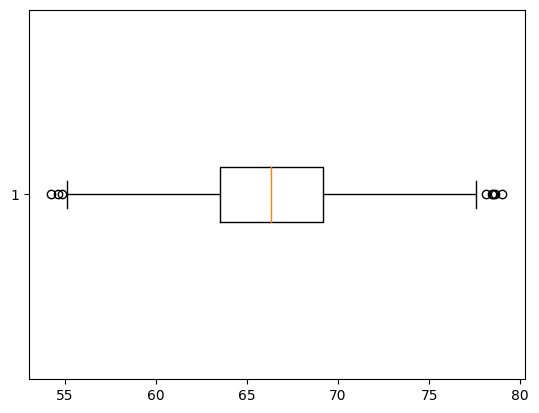

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['Height'], vert=False)

# Outlier by Percentile

---



In [ ]:
upper_outlier=df['Height'].quantile(0.99)
upper_outlier

74.7857900583366

In [ ]:
lower_outlier=df['Height'].quantile(0.01)
lower_outlier

58.13441158671655

# Finding Outliers using normal distribution

---



In [ ]:
high = df['Height'].mean()+3*df['Height'].std()
high

77.91014411714094

In [ ]:
low = df['Height'].mean()-3*df['Height'].std()
low

54.82497539250154

In [ ]:
df5=df[df['Height']>=low]
df5

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
df6=df5[df5['Height']<=high]
df6

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


# Find Outlier using z score


In [ ]:
mean= np.mean(df['Height'])
mean

66.36755975482124

In [ ]:
std=np.std(df['Height'])
std

3.847335739557543

In [ ]:
r=3

In [ ]:
df['Height2']=(df['Height']-mean)/std
print(df['Height2'])

0       1.944061
1       0.627537
2       2.012443
3       1.394060
4       0.913421
          ...   
9995   -0.050660
9996    0.181839
9997   -0.649688
9998    0.693125
9999   -1.149708
Name: Height2, Length: 10000, dtype: float64


In [ ]:
# upper outlier
upper=df[df['Height2']>=r]
upper

,Gender,Height,Weight,Height2
994,Male,78.095867,255.690835,3.048423
1317,Male,78.462053,227.342565,3.143602
2014,Male,78.998742,269.989699,3.283099
3285,Male,78.528210,253.889004,3.160798
3757,Male,78.621374,245.733783,3.185013


In [ ]:
# lower outlier
lower=df[df['Height']<=-r]
lower

,Gender,Height,Weight,Height2
